<a href="https://colab.research.google.com/github/nirmit10000/Social_Media_Political_Bias_Detection_/blob/main/GloVe_%26_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing python packages, importing libraries and utilities

In [102]:
!pip install -U numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2 tensorflow==2.12.0

In [103]:
!pip install matplotlib

In [104]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt


In [105]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [107]:
!pip install tensorflow-addons
import tensorflow_addons as tfa


In [109]:
import gensim.downloader as api

# Load a smaller GloVe model (50D instead of 300D)
glove_model = api.load('glove-wiki-gigaword-50')
from gensim.models import FastText

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [111]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, precision_recall_curve

In [112]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

In [113]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [114]:
# Upgrade pip to avoid version conflicts
!pip install --upgrade pip

# Core Data Science & ML Libraries
!pip install numpy pandas matplotlib seaborn scikit-learn scipy

# NLP-Specific Libraries
!pip install nltk spacy transformers datasets sentencepiece
!python -m spacy download en_core_web_sm  # Download English model for spaCy

# Deep Learning Frameworks (Ensure Compatibility)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install tensorflow keras

# Word Embeddings (GloVe, Word2Vec, FastText)
!pip install gensim

# Utilities
!pip install tqdm joblib

# Ensure all installations are properly set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tensorflow as tf
import nltk
import spacy
import transformers
import gensim
import sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Looking in indexes: https://download.pytorch.org/whl/cpu


In [115]:
from gensim.models import KeyedVectors

In [116]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#GLOVE FEATURE EXTRACTION

In [117]:
df = pd.read_csv('political_social_media.csv', encoding='latin-1')

In [118]:
col_to_be_dropped = ['_unit_id', '_unit_state', '_golden', 'orig__golden',
                     'audience_gold', 'bias_gold', 'embed', 'id', 'message_gold',
                     'bioid', 'label', '_last_judgment_at']
df.drop(col_to_be_dropped, axis=1, inplace=True)

col_transform = ColumnTransformer(
    [('encoder', OneHotEncoder(drop='first', sparse_output=False), ['audience', 'source', 'message'])],
    remainder='passthrough'
)

df= col_transform.fit_transform(df)
df = pd.DataFrame(df, columns=col_transform.get_feature_names_out())
df.columns = df.columns.str.replace(r'encoder__|remainder__', '', regex=True)


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions & hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)
df.drop('text', axis=1, inplace=True)

In [119]:
text_col = 'cleaned_text'
target_col = 'bias'

numerical_cols = ['audience_national', 'source_twitter', 'message_constituency',
                  'message_information', 'message_media', 'message_mobilization',
                  'message_other', 'message_personal', 'message_policy',
                  'message_support', '_trusted_judgments', 'audience:confidence',
                  'bias:confidence', 'message:confidence']

# Convert bias column to binary
df['bias'] = df['bias'].apply(lambda x: 1 if x == 'partisan' else 0)

x_train, x_test, y_train, y_test = train_test_split(df[[text_col] + numerical_cols],
                                                    df[target_col], test_size=0.2, random_state=55)

In [120]:
df.head(5)

,audience_national,source_twitter,message_constituency,message_information,message_media,message_mobilization,message_other,message_personal,message_policy,message_support,_trusted_judgments,audience:confidence,bias,bias:confidence,message:confidence,cleaned_text
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1.0,1,1.0,1.0,rt rep trey radel r slam
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1,1.0,1.0,video full higher cost broken promise
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0,1.0,1.0,please join today remembering fallen hero hono...
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0,1.0,1.0,rt st step toward senate debate leahycrapo bil...
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1.0,1,1.0,1.0,delivery show need update law promote amp prot...


In [121]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-03-21 00:07:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-21 00:07:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-21 00:07:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.5’

gl

In [122]:
!unzip glove.6B.zip glove.6B.100d.txt -d glove/


Archive:  glove.6B.zip
replace glove/glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [123]:

glove_input_file = 'glove/glove.6B.100d.txt'
word2vec_output_file = 'glove/glove.6B.100d.word2vec.txt'

from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file, word2vec_output_file)


<ipython-input-123-487e6135eca8>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [124]:
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
#glove_model is the embedding matrix containing the pretrained_glove_info_vectors

In [125]:
def document_vector(doc, model, vector_size=100):
    words = doc.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

x_train_glove = np.array([document_vector(doc, glove_model) for doc in x_train[text_col]])
x_test_glove = np.array([document_vector(doc, glove_model) for doc in x_test[text_col]])


#GLOVE ANN

In [126]:
glove_ann = tf.keras.models.Sequential()

glove_ann.add(tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape=(x_train_glove.shape[1],))) # Define input shape
glove_ann.add(tf.keras.layers.BatchNormalization())
glove_ann.add(tf.keras.layers.Dropout(0.3))

glove_ann.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
glove_ann.add(tf.keras.layers.BatchNormalization())
glove_ann.add(tf.keras.layers.Dropout(0.3))

glove_ann.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

glove_ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

glove_ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

glove_ann.compile(optimizer = 'adam', loss = tfa.losses.SigmoidFocalCrossEntropy(alpha = 0.3, gamma = 1.5), metrics = ['accuracy'])

In [127]:
model = glove_ann.fit(x_train_glove, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data = (x_test_glove, y_test))

Epoch 1/10
125/125 [==============================] - 5s 10ms/step - loss: 0.1420 - accuracy: 0.6260 - val_loss: 0.0845 - val_accuracy: 0.7360
Epoch 2/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0852 - accuracy: 0.7372 - val_loss: 0.0780 - val_accuracy: 0.7360
Epoch 3/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0796 - accuracy: 0.7390 - val_loss: 0.0768 - val_accuracy: 0.7370
Epoch 4/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0782 - accuracy: 0.7400 - val_loss: 0.0758 - val_accuracy: 0.7370
Epoch 5/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0767 - accuracy: 0.7383 - val_loss: 0.0752 - val_accuracy: 0.7350
Epoch 6/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0752 - accuracy: 0.7380 - val_loss: 0.0751 - val_accuracy: 0.7390
Epoch 7/10
125/125 [==============================] - 2s 12ms/step - loss: 0.0743 - accuracy: 0.7377 - val_loss: 0.0748 - val_accuracy: 0.7360
Epoc

In [128]:

def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = glove_ann.predict(x_test_glove).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (glove_ann.predict(x_test_glove) > optimal_threshold).astype(int)


32/32 [==============================] - 0s 2ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.4444
32/32 [==============================] - 0s 2ms/step


In [129]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction,average = 'weighted'),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted')

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.7490
precision_score: 0.7154
f1_score: 0.6963
recall_score: 0.7490


32/32 [==============================] - 0s 6ms/step


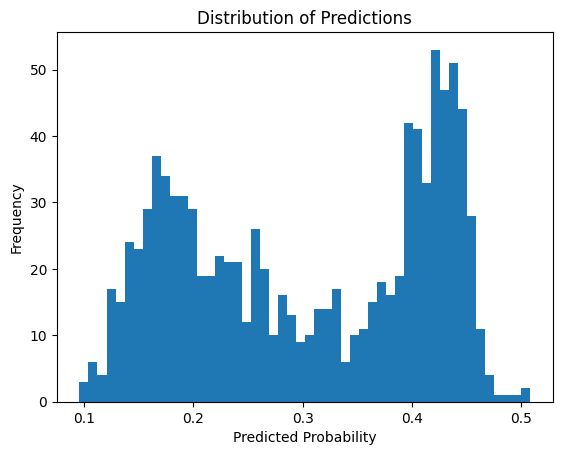

In [130]:


preds = glove_ann.predict(x_test_glove)  # Get raw probabilities
plt.hist(preds, bins=50)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions")
plt.show()

#GLOVE LSTM

In [132]:
embedding_matrix = glove_model

In [133]:
vocab_size = 400000
embedding_dim = 100
embedding_matrix = glove_model.vectors #.vectors important
max_length = 51

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>') # num_words set to vocab_size
tokenizer.fit_on_texts(x_train[text_col]) # fit only on training data
word_index = tokenizer.word_index

# Convert text to sequences of word indices
x_train_sequences = tokenizer.texts_to_sequences(x_train[text_col])
x_test_sequences = tokenizer.texts_to_sequences(x_test[text_col])

# Padding sequences
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [134]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [135]:
glove_lstm = tf.keras.models.Sequential()

vocab_size = 400000
embedding_dim = 100
embedding_matrix = glove_model.vectors #.vectors important
max_length = 51

glove_lstm.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                                         weights=[embedding_matrix], input_length=max_length, trainable=False))
#vocab_size = no. of unique words
#embedding_dim = dim_of_glove
#embedding_matrix = glove_weights
#max_length = max_length_of_a_sentence



glove_lstm.add(tf.keras.layers.LSTM(units=128, return_sequences=False)) # LSTM layer
glove_lstm.add(tf.keras.layers.Dropout(0.3))

glove_lstm.add(tf.keras.layers.Dense(units=64, activation='relu'))
glove_lstm.add(tf.keras.layers.BatchNormalization())
glove_lstm.add(tf.keras.layers.Dropout(0.3))

glove_lstm.add(tf.keras.layers.Dense(units=32, activation='relu'))

glove_lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

glove_lstm.compile(optimizer='adam', loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.3, gamma=1.5), metrics=['accuracy'])

glove_lstm.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 51, 100)           40000000  
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_12 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                     

In [136]:
glove_lstm.fit(x_train_padded, y_train, batch_size = 32, epochs = 10, validation_data=(x_test_padded, y_test), verbose = 1, class_weight = class_weights_dict)

Epoch 1/10
125/125 [==============================] - 26s 183ms/step - loss: 0.1357 - accuracy: 0.6288 - val_loss: 0.0999 - val_accuracy: 0.7360
Epoch 2/10
125/125 [==============================] - 19s 154ms/step - loss: 0.1213 - accuracy: 0.6773 - val_loss: 0.1110 - val_accuracy: 0.7360
Epoch 3/10
125/125 [==============================] - 12s 93ms/step - loss: 0.1162 - accuracy: 0.6963 - val_loss: 0.1120 - val_accuracy: 0.7360
Epoch 4/10
125/125 [==============================] - 12s 96ms/step - loss: 0.1140 - accuracy: 0.7205 - val_loss: 0.1262 - val_accuracy: 0.7360
Epoch 5/10
125/125 [==============================] - 13s 101ms/step - loss: 0.1135 - accuracy: 0.7193 - val_loss: 0.1153 - val_accuracy: 0.7360
Epoch 6/10
125/125 [==============================] - 12s 93ms/step - loss: 0.1130 - accuracy: 0.7215 - val_loss: 0.1002 - val_accuracy: 0.7360
Epoch 7/10
125/125 [==============================] - 13s 105ms/step - loss: 0.1127 - accuracy: 0.7258 - val_loss: 0.1225 - val_accur

In [137]:

def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = glove_lstm.predict(x_test_padded).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (glove_lstm.predict(x_test_padded) > optimal_threshold).astype(int)

32/32 [==============================] - 1s 29ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.4646
32/32 [==============================] - 1s 28ms/step


In [138]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test,y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted',zero_division=1),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted')

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.7360
precision_score: 0.6747
f1_score: 0.6296
recall_score: 0.7360


#GLOVE BILSTM

In [139]:
glove_bilstm = tf.keras.models.Sequential()

vocab_size = 400000
embedding_dim = 100
embedding_matrix = glove_model.vectors  # .vectors important
max_length = 51

glove_bilstm.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                                           weights=[embedding_matrix], input_length=max_length, trainable=False))
# vocab_size = no. of unique words
# embedding_dim = dim_of_glove
# embedding_matrix = glove_weights
# max_length = max_length_of_a_sentence

glove_bilstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True)))  # BiLSTM layer
glove_bilstm.add(tf.keras.layers.LSTM(units=64, return_sequences=False))  # LSTM layer
glove_bilstm.add(tf.keras.layers.Dropout(0.3))

glove_bilstm.add(tf.keras.layers.Dense(units=32, activation='relu'))
glove_bilstm.add(tf.keras.layers.BatchNormalization())
glove_bilstm.add(tf.keras.layers.Dropout(0.3))

glove_bilstm.add(tf.keras.layers.Dense(units=16, activation='relu'))

glove_bilstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

glove_bilstm.compile(optimizer='adam', loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0), metrics=['accuracy'])

glove_bilstm.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 51, 100)           40000000  
                                                                 
 bidirectional_2 (Bidirectio  (None, 51, 256)          234496    
 nal)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_13 (Bat  (None, 32)               128       
 chNormalization)                                    

In [140]:
glove_bilstm.fit(x_train_padded, y_train, validation_data=(x_test_padded, y_test), epochs=10, batch_size=32, verbose=1, class_weight = class_weights_dict)

Epoch 1/10
125/125 [==============================] - 43s 250ms/step - loss: 0.0884 - accuracy: 0.6600 - val_loss: 0.0812 - val_accuracy: 0.7360
Epoch 2/10
125/125 [==============================] - 30s 239ms/step - loss: 0.0797 - accuracy: 0.7063 - val_loss: 0.0747 - val_accuracy: 0.7360
Epoch 3/10
125/125 [==============================] - 30s 240ms/step - loss: 0.0767 - accuracy: 0.7175 - val_loss: 0.0748 - val_accuracy: 0.7360
Epoch 4/10
125/125 [==============================] - 32s 258ms/step - loss: 0.0756 - accuracy: 0.7287 - val_loss: 0.0741 - val_accuracy: 0.7360
Epoch 5/10
125/125 [==============================] - 30s 241ms/step - loss: 0.0741 - accuracy: 0.7358 - val_loss: 0.0753 - val_accuracy: 0.7360
Epoch 6/10
125/125 [==============================] - 30s 241ms/step - loss: 0.0741 - accuracy: 0.7368 - val_loss: 0.0748 - val_accuracy: 0.7360
Epoch 7/10
125/125 [==============================] - 30s 240ms/step - loss: 0.0740 - accuracy: 0.7370 - val_loss: 0.0791 - val_ac

In [141]:

def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = glove_bilstm.predict(x_test_padded).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (glove_bilstm.predict(x_test_padded) > optimal_threshold).astype(int)

32/32 [==============================] - 5s 73ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.4343
32/32 [==============================] - 2s 67ms/step


In [142]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted',zero_division=1),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted')

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.7360
precision_score: 0.8057
f1_score: 0.6241
recall_score: 0.7360


#FAST TEXT FEATURE EXTRACTION

In [155]:
data = pd.read_csv('political_social_media.csv', encoding='latin-1')

col_to_be_dropped = ['_unit_id', '_unit_state', '_golden', 'orig__golden',
                     'audience_gold', 'bias_gold', 'embed', 'id', 'message_gold',
                     'bioid', 'label', '_last_judgment_at']
data.drop(col_to_be_dropped, axis=1, inplace=True)

col_transform = ColumnTransformer(
    [('encoder', OneHotEncoder(drop='first', sparse_output=False), ['audience', 'source', 'message'])],
    remainder='passthrough'
)

data = col_transform.fit_transform(data)
data = pd.DataFrame(data, columns=col_transform.get_feature_names_out())
data.columns = data.columns.str.replace(r'^encoder__|remainder__', '', regex=True)

!pip install nltk
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Download the missing 'punkt_tab' resource

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"http\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", '', text)  # Remove mentions & hashtags
    text = re.sub(r"[^A-Za-z\s]", '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)
data.drop('text', axis=1, inplace=True)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [156]:
text_col = 'cleaned_text'
target_col = 'bias'

numerical_cols = ['audience_national', 'source_twitter', 'message_constituency',
                  'message_information', 'message_media', 'message_mobilization',
                  'message_other', 'message_personal', 'message_policy',
                  'message_support', '_trusted_judgments', 'audience:confidence',
                  'bias:confidence', 'message:confidence']

# Convert bias column to binary
df['bias'] = df['bias'].apply(lambda x: 1 if x == 'partisan' else 0)

x_train, x_test, y_train, y_test = train_test_split(df[[text_col] + numerical_cols],
                                                    df[target_col], test_size=0.2, random_state=55)

In [157]:
import gensim.downloader as api

# Load a smaller GloVe model (50D instead of 300D)
glove_model = api.load('glove-wiki-gigaword-50')
from gensim.models import FastText

In [158]:
from gensim.models.fasttext import FastText


# Assume x_train and x_test contain your tokenized text data
sentences = [doc.split() for doc in x_train[text_col]]  # Tokenizing sentences for FastText training

# Train FastText model
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Save model for later use
fasttext_model.save("fasttext_model.bin")

In [159]:
def document_vector(doc, model, vector_size=100):
    words = doc.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]

    if len(word_vectors) == 0:
        return np.zeros(vector_size)

    return np.mean(word_vectors, axis=0)

# Convert x_train and x_test into FastText vectors
x_train_fasttext = np.array([document_vector(doc, fasttext_model) for doc in x_train[text_col]])
x_test_fasttext = np.array([document_vector(doc, fasttext_model) for doc in x_test[text_col]])

#FAST TEXT ANN

In [160]:
ann_model = tf.keras.models.Sequential()

input_dim = 100  # Feature vector size from FastText

ann_model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(input_dim,)))  # Input layer
ann_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.3))

ann_model.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer

ann_model.compile(optimizer='adam',
                  loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0),
                  metrics=['accuracy'])

ann_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               12928     
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_16 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                     

In [161]:
ann_model.fit(x_train_fasttext, y_train, validation_data=(x_test_fasttext, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
125/125 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9578 - val_loss: 6.1330e-04 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 2.9398e-04 - accuracy: 1.0000 - val_loss: 4.3606e-04 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 7.3376e-05 - accuracy: 1.0000 - val_loss: 1.2291e-04 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 1s 6ms/step - loss: 3.3851e-05 - accuracy: 1.0000 - val_loss: 4.2991e-05 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 1s 11ms/step - loss: 2.0739e-05 - accuracy: 1.0000 - val_loss: 1.3811e-05 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 1s 7ms/step - loss: 1.2994e-05 - accuracy: 1.0000 - val_loss: 6.4181e-06 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 8.8165e-06 - accuracy: 1.0000

In [165]:

def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = ann_model.predict(x_test_fasttext).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (ann_model.predict(x_test_fasttext) > 0.016).astype(int)

32/32 [==============================] - 0s 5ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.0404
32/32 [==============================] - 0s 3ms/step


In [166]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted',zero_division=1),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted',zero_division=1)

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.8140
precision_score: 1.0000
f1_score: 0.8975
recall_score: 0.8140


32/32 [==============================] - 0s 1ms/step


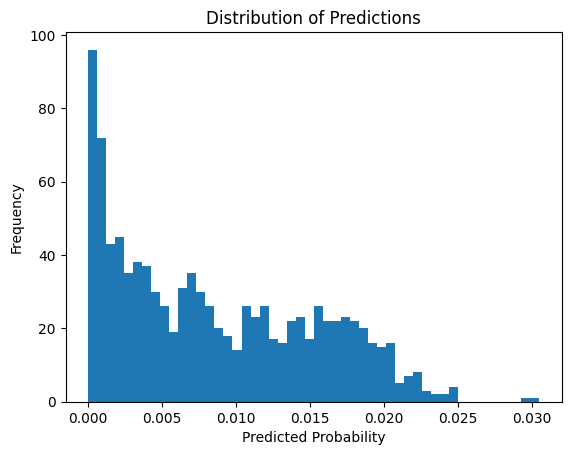

In [167]:
preds = ann_model.predict(x_test_fasttext)  # Get raw probabilities
plt.hist(preds, bins=50)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions")
plt.show()

#FAST TEXT LSTM

In [168]:
x_train_fasttext = x_train_fasttext.reshape(x_train_fasttext.shape[0], 1, x_train_fasttext.shape[1])  # Use shape[1] for the last dimension
x_test_fasttext = x_test_fasttext.reshape(x_test_fasttext.shape[0], 1, x_test_fasttext.shape[1])  # Use shape[1] for the last dimensio



# Create a new LSTM model to avoid variable creation during the fit call
lstm_model_new = tf.keras.models.Sequential()

input_dim = 100  # Feature vector size from FastText
time_steps = 1   # Since input is already averaged

lstm_model_new.add(tf.keras.layers.LSTM(units=128, return_sequences=True, input_shape=(time_steps, input_dim)))  # LSTM layer
lstm_model_new.add(tf.keras.layers.LSTM(units=64, return_sequences=False))  # Last LSTM layer

lstm_model_new.add(tf.keras.layers.Dense(units=32, activation='relu'))
lstm_model_new.add(tf.keras.layers.BatchNormalization())
lstm_model_new.add(tf.keras.layers.Dropout(0.3))

lstm_model_new.add(tf.keras.layers.Dense(units=16, activation='relu'))
lstm_model_new.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer

lstm_model_new.compile(optimizer='adam',
                   loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0),
                   metrics=['accuracy'])
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))



In [169]:
# Fit the new model to avoid variable creation issues.
lstm_model_new.fit(x_train_fasttext, y_train, validation_data=(x_test_fasttext, y_test), epochs=10, batch_size=32, verbose=1, class_weight = class_weights_dict)

Epoch 1/10
125/125 [==============================] - 19s 55ms/step - loss: 0.0291 - accuracy: 0.9970 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 2s 18ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 8.1930e-04 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 2s 15ms/step - loss: 2.8969e-04 - accuracy: 1.0000 - val_loss: 1.6107e-04 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 2s 14ms/step - loss: 1.1947e-04 - accuracy: 1.0000 - val_loss: 5.9209e-05 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 2s 14ms/step - loss: 2.6480e-04 - accuracy: 0.9998 - val_loss: 7.1637e-04 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 2s 16ms/step - loss: 6.7953e-05 - accuracy: 1.0000 - val_loss: 3.0746e-06 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 3s 25ms/step - loss: 4.0135e-05 - accuracy: 1.0000 

In [203]:

def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = lstm_model_new.predict(x_test_fasttext).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (lstm_model_new.predict(x_test_fasttext) > 0.0176).astype(int)

32/32 [==============================] - 0s 7ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.0303
32/32 [==============================] - 0s 6ms/step


In [204]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted'),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted'),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted',zero_division=1)

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.8650
precision_score: 1.0000
f1_score: 0.9276
recall_score: 0.8650


32/32 [==============================] - 0s 3ms/step


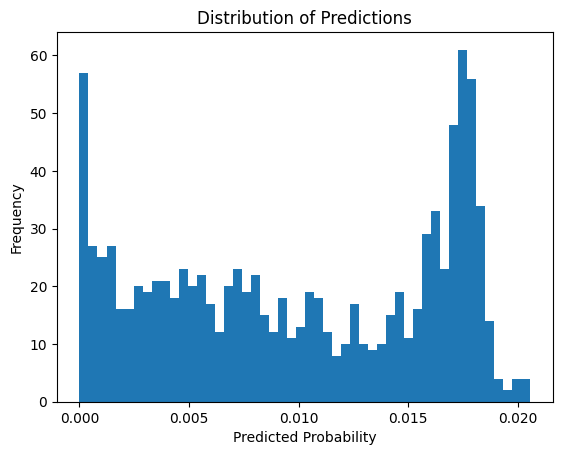

In [172]:
preds = lstm_model_new.predict(x_test_fasttext)  # Get raw probabilities
plt.hist(preds, bins=50)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions")
plt.show()

#FAST TEXT BILSTM

In [185]:
bilstm_model = tf.keras.models.Sequential()

input_dim = 100  # Feature vector size from FastText
time_steps = 1   # Since input is already averaged

bilstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True), input_shape=(time_steps, input_dim)))  # BiLSTM layer
bilstm_model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))  # Last LSTM layer

bilstm_model.add(tf.keras.layers.Dense(units=32, activation='relu'))
bilstm_model.add(tf.keras.layers.BatchNormalization())
bilstm_model.add(tf.keras.layers.Dropout(0.3))

bilstm_model.add(tf.keras.layers.Dense(units=16, activation='relu'))
bilstm_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer

bilstm_model.compile(optimizer='adam',
                     loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0),
                     metrics=['accuracy'])

bilstm_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 1, 256)           234496    
 nal)                                                            
                                                                 
 lstm_15 (LSTM)              (None, 64)                82176     
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_18 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 16)              

In [186]:
bilstm_model.fit(x_train_fasttext, y_train, validation_data=(x_test_fasttext, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
125/125 [==============================] - 11s 25ms/step - loss: 0.0230 - accuracy: 0.9918 - val_loss: 1.7815e-04 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 1s 12ms/step - loss: 8.9812e-04 - accuracy: 1.0000 - val_loss: 2.9953e-04 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 1s 12ms/step - loss: 3.1730e-04 - accuracy: 0.9998 - val_loss: 4.7356e-04 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 1s 12ms/step - loss: 1.0323e-04 - accuracy: 1.0000 - val_loss: 3.1250e-05 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 3s 24ms/step - loss: 1.5345e-04 - accuracy: 0.9998 - val_loss: 2.8538e-15 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 2s 18ms/step - loss: 4.6982e-05 - accuracy: 1.0000 - val_loss: 2.5513e-12 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 2s 12ms/step - loss: 2.4275e-05 - accuracy:

In [200]:
def find_best_threshold_accuracy(y_true, y_pred_probs):
    """
    Finds the optimal threshold that maximizes accuracy.

    Parameters:
    y_true (array): True binary labels (0 or 1).
    y_pred_probs (array): Predicted probabilities.

    Returns:
    best_threshold (float): Threshold that gives the highest accuracy.
    """
    thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1
    accuracies = []

    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    best_threshold = thresholds[np.argmax(accuracies)]  # Get threshold with max accuracy

    return best_threshold

# Get probabilities for class 1
y_pred_probs = bilstm_model.predict(x_test_fasttext).flatten()

# Find the best threshold based on Accuracy
optimal_threshold = find_best_threshold_accuracy(y_test, y_pred_probs)
print(f"OPTIMAL THRESHOLD (Accuracy-based): {optimal_threshold:.4f}")

# Apply threshold to get final predictions
y_prediction = (bilstm_model.predict(x_test_fasttext) > 0.014).astype(int)

32/32 [==============================] - 0s 11ms/step
OPTIMAL THRESHOLD (Accuracy-based): 0.0202
32/32 [==============================] - 0s 12ms/step


In [201]:
metrics_dict = {
    "accuracy_score": accuracy_score(y_test, y_prediction),
    "precision_score": precision_score(y_test, y_prediction, average = 'weighted',zero_division=1),
    "f1_score": f1_score(y_test, y_prediction, average = 'weighted',zero_division=1),
    "recall_score": recall_score(y_test, y_prediction, average = 'weighted',zero_division=1)

}

# Print results
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

accuracy_score: 0.9330
precision_score: 1.0000
f1_score: 0.9653
recall_score: 0.9330


32/32 [==============================] - 0s 8ms/step


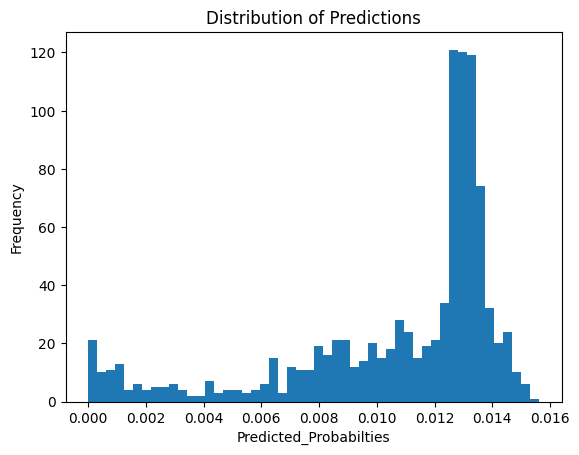

In [202]:
preds = bilstm_model.predict(x_test_fasttext)
plt.hist(preds, bins = 50)
plt.xlabel('Predicted_Probabilties')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.show()